<a href="https://colab.research.google.com/github/JatinKoul1234/DATA-SCIENCE/blob/main/Housing_Data_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [ ]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.2 MB/s eta 0:00:00


In [ ]:
from category_encoders import OneHotEncoder

In [ ]:
df=pd.read_csv("/content/Housing_test_data.csv")
df.head(7)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
df1=df[["area","price"]]
df1.head(10)

,area,price
0,7420,13300000
1,8960,12250000
2,9960,12250000
3,7500,12215000
4,7420,11410000
5,7500,10850000
6,8580,10150000
7,16200,10150000
8,8100,9870000
9,5750,9800000


In [ ]:
df1.describe()


,area,price
count,545.000000,5.450000e+02
mean,5150.541284,4.766729e+06
std,2170.141023,1.870440e+06
min,1650.000000,1.750000e+06
25%,3600.000000,3.430000e+06
50%,4600.000000,4.340000e+06
75%,6360.000000,5.740000e+06
max,16200.000000,1.330000e+07


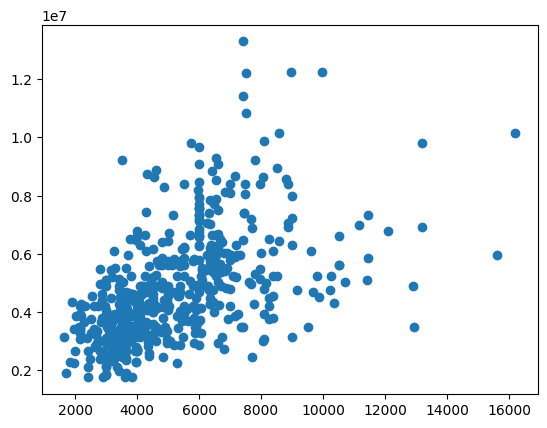

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
plt.scatter(x=df["area"],y=df["price"])



In [ ]:
x=df1[["area"]]
y=df1.price
x.shape , y.shape

((545, 1), (545,))

In [ ]:
y_mean=y.mean()
y_pred_baseline=[y_mean]*len(y)
y_pred_baseline

[4766729.247706422,
 4766729.247706422,
 4766729.247706422,
 4766729.247706422,
 4766729.247706422,
 4766729.247706422,
 4766729.247706422,
 4766729.247706422,
 4766729.247706422,
 4766729.247706422,
 4766729.247706422,
 4766729.247706422,
 4766729.247706422,
 4766729.247706422,
 4766729.247706422,
 4766729.247706422,
 4766729.247706422,
 4766729.247706422,
 4766729.247706422,
 4766729.247706422,
 4766729.247706422,
 4766729.247706422,
 4766729.247706422,
 4766729.247706422,
 4766729.247706422,
 4766729.247706422,
 4766729.247706422,
 4766729.247706422,
 4766729.247706422,
 4766729.247706422,
 4766729.247706422,
 4766729.247706422,
 4766729.247706422,
 4766729.247706422,
 4766729.247706422,
 4766729.247706422,
 4766729.247706422,
 4766729.247706422,
 4766729.247706422,
 4766729.247706422,
 4766729.247706422,
 4766729.247706422,
 4766729.247706422,
 4766729.247706422,
 4766729.247706422,
 4766729.247706422,
 4766729.247706422,
 4766729.247706422,
 4766729.247706422,
 4766729.247706422,


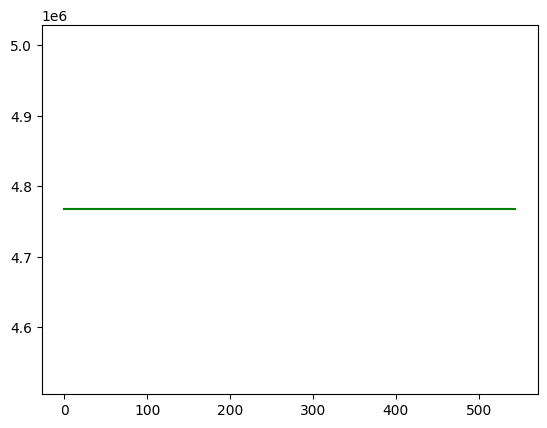

In [ ]:
plt.plot(y_pred_baseline , color="green")

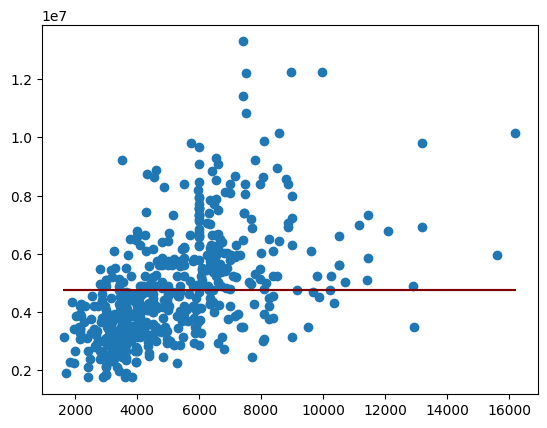

In [ ]:
plt.plot(x.values , y_pred_baseline , color="maroon")
plt.scatter(x,y)

In [ ]:
mae_baseline = mean_absolute_error(y,y_pred_baseline)
mae_baseline

1440702.9248043096

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x,y)


LinearRegression()

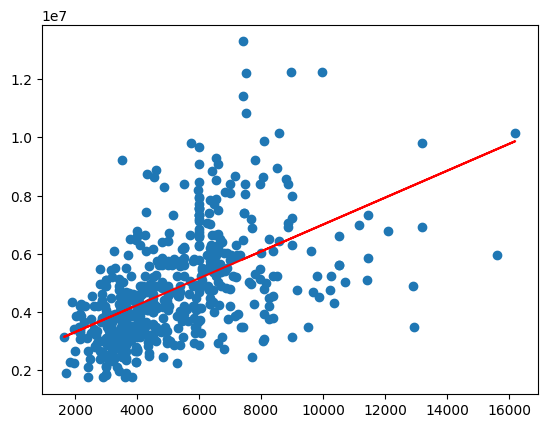

In [ ]:
y_m=model.predict(x)
plt.plot(x.values , y_m , color="red")
plt.scatter(x,y)


In [ ]:
model.coef_

array([461.97489427])

In [ ]:
model.intercept_

2387308.48239643

In [ ]:
df.dropna(inplace=True)


In [ ]:
mae_model = mean_absolute_error(y,y_m)

In [ ]:
data2=df[["price","area","mainroad","basement","furnishingstatus"]]

In [ ]:
x_train=data2.drop(columns = "price")
y_train=data2.price

In [ ]:
model=make_pipeline(
    OneHotEncoder(),
    LinearRegression()
)
model.fit(x_train,y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['mainroad', 'basement',
                                     'furnishingstatus'])),
                ('linearregression', LinearRegression())])

In [ ]:
df=pd.read_csv("/content/Bengaluru_House_Data.csv")
df["total_sqft"] = pd.to_numeric(df["total_sqft"], errors='coerce').fillna(0, downcast='infer')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200.0,2.0,1.0,51.00


In [ ]:
df1=df[["total_sqft","price"]]
df1.head(10)

,total_sqft,price
0,1056.0,39.07
1,2600.0,120.00
2,1440.0,62.00
3,1521.0,95.00
4,1200.0,51.00
5,1170.0,38.00
6,2732.0,204.00
7,3300.0,600.00
8,1310.0,63.25
9,1020.0,370.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  float64
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(4), object(5)
memory usage: 936.7+ KB


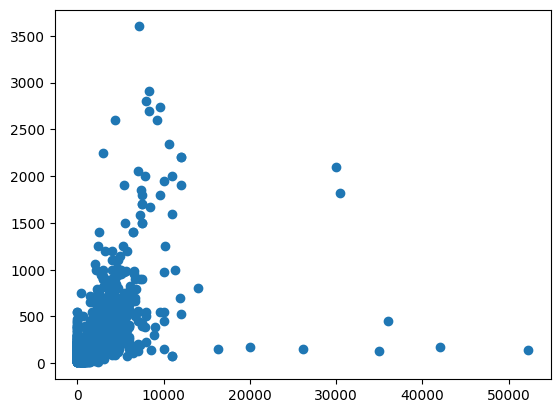

In [ ]:
plt.scatter(x=df["total_sqft"],y=df["price"])

In [ ]:
x=df1[["total_sqft"]]
y=df1.price
x.shape , y.shape

((13320, 1), (13320,))

In [ ]:
y_mean=y.mean()
y_baseline=[y_mean]*len(y)
y_baseline

[112.5656265015015,
 112.5656265015015,
 112.5656265015015,
 112.5656265015015,
 112.5656265015015,
 112.5656265015015,
 112.5656265015015,
 112.5656265015015,
 112.5656265015015,
 112.5656265015015,
 112.5656265015015,
 112.5656265015015,
 112.5656265015015,
 112.5656265015015,
 112.5656265015015,
 112.5656265015015,
 112.5656265015015,
 112.5656265015015,
 112.5656265015015,
 112.5656265015015,
 112.5656265015015,
 112.5656265015015,
 112.5656265015015,
 112.5656265015015,
 112.5656265015015,
 112.5656265015015,
 112.5656265015015,
 112.5656265015015,
 112.5656265015015,
 112.5656265015015,
 112.5656265015015,
 112.5656265015015,
 112.5656265015015,
 112.5656265015015,
 112.5656265015015,
 112.5656265015015,
 112.5656265015015,
 112.5656265015015,
 112.5656265015015,
 112.5656265015015,
 112.5656265015015,
 112.5656265015015,
 112.5656265015015,
 112.5656265015015,
 112.5656265015015,
 112.5656265015015,
 112.5656265015015,
 112.5656265015015,
 112.5656265015015,
 112.5656265015015,


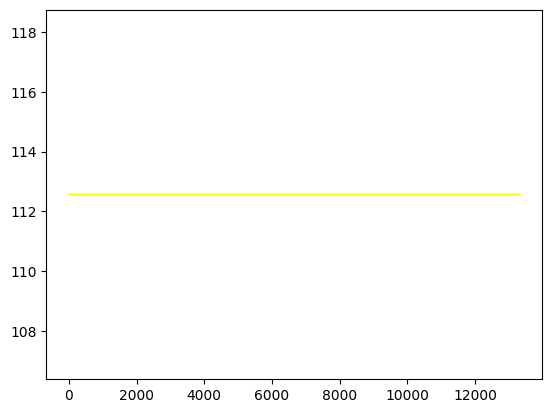

In [ ]:
plt.plot(y_baseline,color="yellow")

In [ ]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
mae_baseline=mean_absolute_error(y,y_baseline)
mae_baseline


74.39584068048904

In [ ]:
model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [ ]:
model.coef_

array([0.06723754])

In [ ]:
mae_model=mean_absolute_error(y,y_baseline)
mae_model

74.39584068048904